# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.0223,  0.1423,  0.7619,  0.9768,  0.377 ,  0.1734,  0.0622,  0.1418,  0.6556,  0.6455,
        0.6103,  0.1575,  0.7992,  0.1215,  0.1392,  0.6668,  0.6907,  0.5706,  0.9135,  0.4758,
        0.7359,  0.4476,  0.427 ,  0.4025,  0.5675,  0.241 ,  0.7715,  0.6374,  0.177 ,  0.785 ])

In [6]:
y

array([  8.0669,   8.4268,  10.2856,  10.9305,   9.1309,   8.5203,   8.1867,   8.4255,   9.9667,
         9.9366,   9.831 ,   8.4725,  10.3976,   8.3646,   8.4176,  10.0005,  10.0722,   9.7119,
        10.7406,   9.4273,  10.2076,   9.3427,   9.2811,   9.2074,   9.7026,   8.7231,  10.3145,
         9.9121,   8.5309,  10.3551])

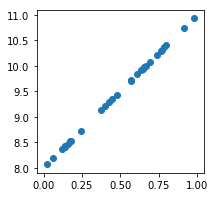

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.9742

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!